# Problem Statement:

### The goal of this project is to build a predictive model that forecasts whether a flight will be delayed based on various features related to the flight's schedule, airline, and other relevant factors. By analyzing historical flight data, the model aims to identify patterns and factors that contribute to fight delays. This Information can help airlines to improve scheduling and operational efficiency.

# IMPORT LIBRARIES

In [1]:
import datetime, warnings, scipy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# IMPORT THE DATASETS

In [2]:
flightsinfo = pd.read_csv("flights.csv",dtype={"ORIGIN_AIRPORT":"string","DESTINATION_AIRPORT":"string"})

In [3]:
flightsinfo.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
flightsinfo.info()#printing column names and datatype of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       string 
 8   DESTINATION_AIRPORT  string 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [5]:
#printing the actual shape of imported data
flightsinfo.shape

(5819079, 31)

In [6]:
flightsinfo.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [7]:
#command generates summary statistics (like count, mean, standard deviation, min, max, and quartiles) 
# for the numerical columns in the flightsinfo DataFrame, providing an overview of the data distribution.

flightsinfo.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [8]:
#importing another two datasets
airport = pd.read_csv('airports.csv')
airlines = pd.read_csv('airlines.csv')

In [9]:
# printing top 10 rows of airport 
airport.head(10)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
5,ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25305,-70.06018
6,ACT,Waco Regional Airport,Waco,TX,USA,31.61129,-97.23052
7,ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.97812,-124.10862
8,ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.45758,-74.57717
9,ADK,Adak Airport,Adak,AK,USA,51.87796,-176.64603


In [10]:
airport.shape#printing actual shape of airport data

(322, 7)

In [11]:
airport.info()#printing column names and datatype of each column of airport 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [12]:
airlines.head(10)# printing top 10 rows of airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


# EDA AND PREPROCESSING

In [13]:
# Check for null or na values in airport dataset.

# This calculates the total number of missing (NaN) values for each column 
# in the airport DataFrame, returning a Series where each index is a column name 
# and the value is the count of missing entries in that column
airport.isna().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [14]:
#Drop the rows in airport dataset where na or null values are present 
airport=airport.dropna()

In [19]:
#  we drop all the rows for some attributes
# which have null values as they make up a small percentage of the dataset

flightsinfo_NULL = flightsinfo.isnull().sum()*100/flightsinfo.shape[0]


In [20]:
flightsinfo_NULL

YEAR                    0.000000
MONTH                   0.000000
DAY                     0.000000
DAY_OF_WEEK             0.000000
AIRLINE                 0.000000
FLIGHT_NUMBER           0.000000
TAIL_NUMBER             0.252978
ORIGIN_AIRPORT          0.000000
DESTINATION_AIRPORT     0.000000
SCHEDULED_DEPARTURE     0.000000
DEPARTURE_TIME          1.480526
DEPARTURE_DELAY         1.480526
TAXI_OUT                1.530259
WHEELS_OFF              1.530259
SCHEDULED_TIME          0.000103
ELAPSED_TIME            1.805629
AIR_TIME                1.805629
DISTANCE                0.000000
WHEELS_ON               1.589822
TAXI_IN                 1.589822
SCHEDULED_ARRIVAL       0.000000
ARRIVAL_TIME            1.589822
ARRIVAL_DELAY           1.805629
DIVERTED                0.000000
CANCELLED               0.000000
CANCELLATION_REASON    98.455357
AIR_SYSTEM_DELAY       81.724960
SECURITY_DELAY         81.724960
AIRLINE_DELAY          81.724960
LATE_AIRCRAFT_DELAY    81.724960
WEATHER_DE

In [21]:
# dropping all rows that contain NaN or missing value of selected  columns
flightsinfo1 = flightsinfo.dropna(subset = ["TAIL_NUMBER",'DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME',
'ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','ARRIVAL_TIME','ARRIVAL_DELAY'])


In [22]:
flightsinfo1.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER                  0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
TAXI_OUT                     0
WHEELS_OFF                   0
SCHEDULED_TIME               0
ELAPSED_TIME                 0
AIR_TIME                     0
DISTANCE                     0
WHEELS_ON                    0
TAXI_IN                      0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME                 0
ARRIVAL_DELAY                0
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5714008
AIR_SYSTEM_DELAY       4650569
SECURITY_DELAY         4650569
AIRLINE_DELAY          4650569
LATE_AIRCRAFT_DELAY    4650569
WEATHER_DELAY          4650569
dtype: int64

In [23]:
#Dropping all the non-contributing factors of delays as they are redundant ,we are only going to focus on the over all delay

flightsinfo2 = flightsinfo1.drop(['CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY',
                    'LATE_AIRCRAFT_DELAY','WEATHER_DELAY'],axis = 1)


In [24]:
flightsinfo2.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
dtype: int64

In [25]:
#now data contain zero missing data and ready for further preprocessing and visualization

In [26]:
flightsinfo2.shape

(5714008, 25)

In [27]:
flightsinfo2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5714008 entries, 0 to 5819078
Data columns (total 25 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       string 
 8   DESTINATION_AIRPORT  string 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

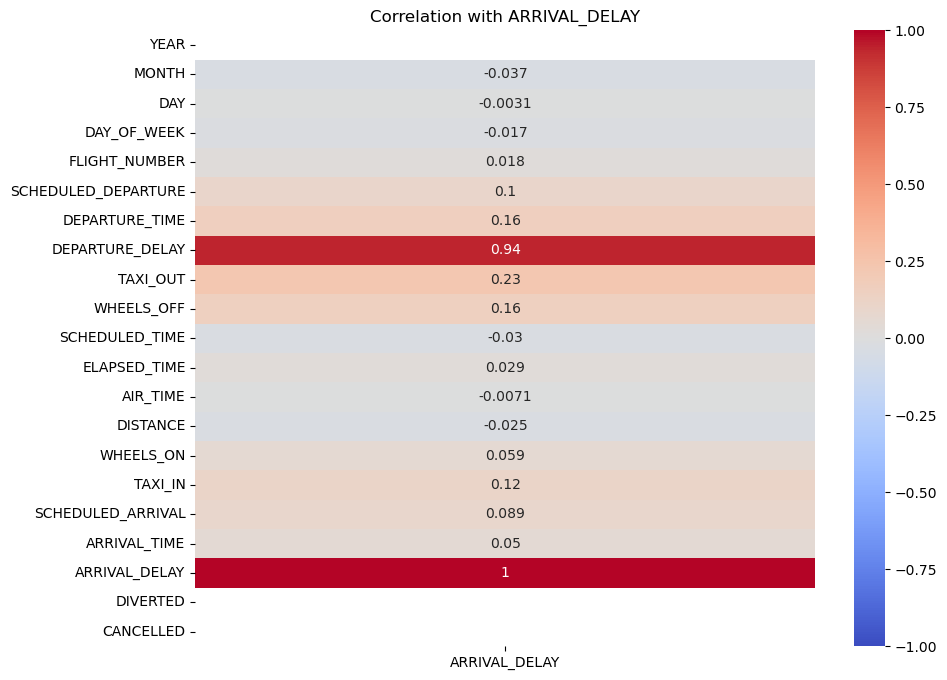

In [28]:
correlation_matrix = flightsinfo2.corr()

# Filter the correlation matrix to only show correlations with ARRIVAL_DELAY
arrival_delay_corr = correlation_matrix[['ARRIVAL_DELAY']]

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(arrival_delay_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with ARRIVAL_DELAY')
plt.show()

### From above heatmap we select important feartures need for model training : SCHEDULED_DEPARTURE, DEPARTURE_TIME , WHEELS_OFF , TAXI_OUT ,TAXI_IN

In [29]:
flightsinfo2[['WHEELS_OFF','DEPARTURE_TIME','SCHEDULED_DEPARTURE']]

,WHEELS_OFF,DEPARTURE_TIME,SCHEDULED_DEPARTURE
0,15.0,2354.0,5
1,14.0,2.0,10
2,34.0,18.0,20
3,30.0,15.0,20
4,35.0,24.0,25
...,...,...,...
5819074,17.0,2355.0,2359
5819075,12.0,2355.0,2359
5819076,7.0,2350.0,2359
5819077,3.0,2353.0,2359


### we can see that 'WHEELS_OFF','DEPARTURE_TIME','SCHEDULED_DEPARTURE' is not in well formated ,we need to format it for better understanding as they are important features for model training 

In [30]:
# This function converts a given number
#  of hours into a datetime.time object representing the corresponding time in hours and minutes.
# for example-->hours = 1230 
#               Output: 12:30:00

import datetime

def create_time_formatted(value):
    # Convert float to integer by truncating the decimal part
    if isinstance(value, float):
        value = int(value)
    
    # Check if the value is an integer
    if isinstance(value, int):
        # Handle the special case for 2400
        if value == 2400:
            return datetime.time(0, 0)
        
        # Format the number as a 4-digit string (e.g., 900 becomes "0900")
        formatted_hours = "{0:04d}".format(value)
        
        # Extract the first two characters as hours and the last two as minutes
        hour_part = int(formatted_hours[:2])
        minute_part = int(formatted_hours[2:])
        
        # Return a time object using the extracted hours and minutes
        return datetime.time(hour_part, minute_part)
    

### Covert columns in HH:MM:SS format 

In [31]:
flightsinfo2['WHEELS_OFF'] = flightsinfo2['WHEELS_OFF'].apply(create_time_formatted)
flightsinfo2['Actual_Departure'] = flightsinfo1['DEPARTURE_TIME'].apply(create_time_formatted)
flightsinfo2['Scheduled_Departure'] = flightsinfo1['SCHEDULED_DEPARTURE'].apply(create_time_formatted)

In [32]:
flightsinfo2[['Actual_Departure','Scheduled_Departure','WHEELS_OFF']]

,Actual_Departure,Scheduled_Departure,WHEELS_OFF
0,23:54:00,00:05:00,00:15:00
1,00:02:00,00:10:00,00:14:00
2,00:18:00,00:20:00,00:34:00
3,00:15:00,00:20:00,00:30:00
4,00:24:00,00:25:00,00:35:00
...,...,...,...
5819074,23:55:00,23:59:00,00:17:00
5819075,23:55:00,23:59:00,00:12:00
5819076,23:50:00,23:59:00,00:07:00
5819077,23:53:00,23:59:00,00:03:00


### formatting time of other columns for better understanding 

In [33]:
flightsinfo2['Scheduled_Arrival'] = flightsinfo1['SCHEDULED_ARRIVAL'].apply(create_time_formatted)
flightsinfo2['Actual_Arrival'] = flightsinfo2['ARRIVAL_TIME'].apply(create_time_formatted)

In [34]:
flightsinfo2[['Scheduled_Arrival','Actual_Arrival']]

,Scheduled_Arrival,Actual_Arrival
0,04:30:00,04:08:00
1,07:50:00,07:41:00
2,08:06:00,08:11:00
3,08:05:00,07:56:00
4,03:20:00,02:59:00
...,...,...
5819074,08:19:00,07:53:00
5819075,04:46:00,04:30:00
5819076,04:40:00,04:32:00
5819077,03:40:00,03:30:00


In [35]:
# Function to convert HH:MM:SS to minutes
from datetime import datetime

def time_to_minutes(time_obj):
    return time_obj.hour * 60 + time_obj.minute


### We need to convert the WHEELS_OFF,SCHEDULED_DEPARTURE and DEPARTURE_TIME in minutes for model training 

In [36]:
flightsinfo2['SCHEDULED_DEPARTURE'] = flightsinfo2['Scheduled_Departure'].apply(time_to_minutes)
flightsinfo2['DEPARTURE_TIME'] = flightsinfo2['Actual_Departure'].apply(time_to_minutes)
flightsinfo2['WHEELS_OFF'] = flightsinfo2['WHEELS_OFF'].apply(time_to_minutes)

In [37]:
flightsinfo2[['SCHEDULED_DEPARTURE','DEPARTURE_TIME','WHEELS_OFF']]

,SCHEDULED_DEPARTURE,DEPARTURE_TIME,WHEELS_OFF
0,5,1434,15
1,10,2,14
2,20,18,34
3,20,15,30
4,25,24,35
...,...,...,...
5819074,1439,1435,17
5819075,1439,1435,12
5819076,1439,1430,7
5819077,1439,1433,3


In [38]:
flightsinfo2.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'Actual_Departure',
       'Scheduled_Departure', 'Scheduled_Arrival', 'Actual_Arrival'],
      dtype='object')

In [39]:
# Transform year month and day into date time format

flightsinfo2['DATE'] = pd.to_datetime(flightsinfo2[['YEAR','MONTH','DAY']])


In [40]:
flightsinfo2['DATE']

0         2015-01-01
1         2015-01-01
2         2015-01-01
3         2015-01-01
4         2015-01-01
             ...    
5819074   2015-12-31
5819075   2015-12-31
5819076   2015-12-31
5819077   2015-12-31
5819078   2015-12-31
Name: DATE, Length: 5714008, dtype: datetime64[ns]

In [41]:
# Add a new column 'WEEK' which contains the day of the week from the 'DATE' column
flightsinfo2['WEEK'] = flightsinfo2['DATE'].dt.day_name()


In [42]:
flightsinfo2['WEEK']

0          Thursday
1          Thursday
2          Thursday
3          Thursday
4          Thursday
             ...   
5819074    Thursday
5819075    Thursday
5819076    Thursday
5819077    Thursday
5819078    Thursday
Name: WEEK, Length: 5714008, dtype: object

In [43]:
#Create a TIME_OF_DAY column for further use in visualization purpose

# Function to categorize time of day
def categorize_time_of_day(minutes):
    if 240 <= minutes < 720:
        return 'Morning'
    elif 720 <= minutes < 1080:
        return 'Afternoon'
    elif 1080 <= minutes < 1260:
        return 'Evening'
    else:
        return 'Night'
    
# Apply the categorization function to create 'Time_of_Day'
flightsinfo2['TIME_OF_DAY'] = flightsinfo2['DEPARTURE_TIME'].apply(categorize_time_of_day)


In [44]:
flightsinfo2['TIME_OF_DAY'].value_counts()

Morning      2313775
Afternoon    2057602
Evening       914265
Night         428366
Name: TIME_OF_DAY, dtype: int64

In [45]:
flightsinfo2 = flightsinfo2.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')
#The code merges the flightsinfo2 DataFrame with the airlines DataFrame based on the 'AIRLINE' and 'IATA_CODE' columns
# keeping only rows that have matching values in both DataFrames.

In [46]:
flightsinfo2.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE_x', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'Actual_Departure',
       'Scheduled_Departure', 'Scheduled_Arrival', 'Actual_Arrival', 'DATE',
       'WEEK', 'TIME_OF_DAY', 'IATA_CODE', 'AIRLINE_y'],
      dtype='object')

In [47]:
flightsinfo2 = flightsinfo2.drop(['IATA_CODE'], axis=1)

In [48]:
flightsinfo2 = flightsinfo2.rename(columns={"AIRLINE_x":"AIRLINE","AIRLINE_y":"AIRLINE_NAME"})

In [49]:
flightsinfo2 = flightsinfo2.merge(airport, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='inner')
#The code merges the flightsinfo2 DataFrame with the airport DataFrame based on the 'ORIGIN_AIRPORT' and 'IATA_CODE' columns, 
# keeping only rows that have matching values in both DataFrames

In [50]:
flightsinfo2.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'Actual_Departure',
       'Scheduled_Departure', 'Scheduled_Arrival', 'Actual_Arrival', 'DATE',
       'WEEK', 'TIME_OF_DAY', 'AIRLINE_NAME', 'IATA_CODE', 'LATITUDE',
       'LONGITUDE', 'CITY', 'AIRPORT', 'index', 'FLIGHT_COUNT'],
      dtype='object')

In [51]:
flightsinfo2 = flightsinfo2.merge(airport, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='inner')
#The code merges the flightsinfo2 DataFrame with the airport DataFrame based on the 'DESTINATION_AIRPORT' and 'IATA_CODE' columns, 
# keeping only rows that have matching values in both DataFrames

In [52]:
flightsinfo2.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'Actual_Departure',
       'Scheduled_Departure', 'Scheduled_Arrival', 'Actual_Arrival', 'DATE',
       'WEEK', 'TIME_OF_DAY', 'AIRLINE_NAME', 'IATA_CODE_x', 'LATITUDE_x',
       'LONGITUDE_x', 'CITY_x', 'AIRPORT_x', 'index_x', 'FLIGHT_COUNT_x',
       'IATA_CODE_y', 'LATITUDE_y', 'LONGITUDE_y', 'CITY_y', 'AIRPORT_y',
       'index_y', 'FLIGHT_COUNT_y'],
      dtype='object')

In [53]:
#Longitude and Latitude are not useful so they are being dropped for further modelling and perfromance based issues .
flightsinfo2 = flightsinfo2.drop(['LATITUDE_x', 'LONGITUDE_x', 'LATITUDE_y', 'LONGITUDE_y','index_x','index_y'], axis=1)

In [54]:
flightsinfo2 = flightsinfo2.rename(columns={'IATA_CODE_x':'ORG_AIRPORT_CODE','AIRPORT_x':'ORG_AIRPORT_NAME','CITY_x':'ORIGIN_CITY',
                             'IATA_CODE_y':'DEST_AIRPORT_CODE','AIRPORT_y':'DEST_AIRPORT_NAME','CITY_y':'DESTINATION_CITY'})

In [55]:
flightsinfo2

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,TIME_OF_DAY,AIRLINE_NAME,ORG_AIRPORT_CODE,ORIGIN_CITY,ORG_AIRPORT_NAME,FLIGHT_COUNT_x,DEST_AIRPORT_CODE,DESTINATION_CITY,DEST_AIRPORT_NAME,FLIGHT_COUNT_y
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,Night,Alaska Airlines Inc.,ANC,Anchorage,Ted Stevens Anchorage International Airport,16005,SEA,Seattle,Seattle-Tacoma International Airport,110899
1,2015,1,1,4,AS,108,N309AS,ANC,SEA,45,...,Night,Alaska Airlines Inc.,ANC,Anchorage,Ted Stevens Anchorage International Airport,16005,SEA,Seattle,Seattle-Tacoma International Airport,110899
2,2015,1,1,4,AS,134,N464AS,ANC,SEA,115,...,Night,Alaska Airlines Inc.,ANC,Anchorage,Ted Stevens Anchorage International Airport,16005,SEA,Seattle,Seattle-Tacoma International Airport,110899
3,2015,1,1,4,AS,114,N303AS,ANC,SEA,140,...,Night,Alaska Airlines Inc.,ANC,Anchorage,Ted Stevens Anchorage International Airport,16005,SEA,Seattle,Seattle-Tacoma International Airport,110899
4,2015,1,1,4,AS,730,N423AS,ANC,SEA,305,...,Morning,Alaska Airlines Inc.,ANC,Anchorage,Ted Stevens Anchorage International Airport,16005,SEA,Seattle,Seattle-Tacoma International Airport,110899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5221995,2015,12,29,2,EV,2734,N884AS,MEI,PIB,1246,...,Evening,Atlantic Southeast Airlines,MEI,Meridian,Meridian Regional Airport,907,PIB,Hattiesburg-Laurel,Hattiesburg-Laurel Regional Airport,573
5221996,2015,12,30,3,EV,2730,N880AS,MEI,PIB,875,...,Afternoon,Atlantic Southeast Airlines,MEI,Meridian,Meridian Regional Airport,907,PIB,Hattiesburg-Laurel,Hattiesburg-Laurel Regional Airport,573
5221997,2015,12,30,3,EV,2734,N907EV,MEI,PIB,1246,...,Evening,Atlantic Southeast Airlines,MEI,Meridian,Meridian Regional Airport,907,PIB,Hattiesburg-Laurel,Hattiesburg-Laurel Regional Airport,573
5221998,2015,12,31,4,EV,2730,N907EV,MEI,PIB,875,...,Afternoon,Atlantic Southeast Airlines,MEI,Meridian,Meridian Regional Airport,907,PIB,Hattiesburg-Laurel,Hattiesburg-Laurel Regional Airport,573


In [56]:
data_vizual = flightsinfo2[['AIRLINE','AIRLINE_NAME','ORG_AIRPORT_NAME','ORIGIN_CITY',
                               'DEST_AIRPORT_NAME','DESTINATION_CITY','ORIGIN_AIRPORT',
                               'DESTINATION_AIRPORT','DISTANCE','Actual_Departure','DATE','WEEK',
                               'Scheduled_Departure','DEPARTURE_DELAY','Actual_Arrival','Scheduled_Arrival','ARRIVAL_DELAY',
                              'SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','TAXI_IN','TAXI_OUT','WHEELS_OFF','SCHEDULED_DEPARTURE','DEPARTURE_TIME','TIME_OF_DAY',]]

In [57]:
# Create a copy of the data_vizual DataFrame to avoid modifying the original data
Flights = data_vizual.copy()

# Visualization

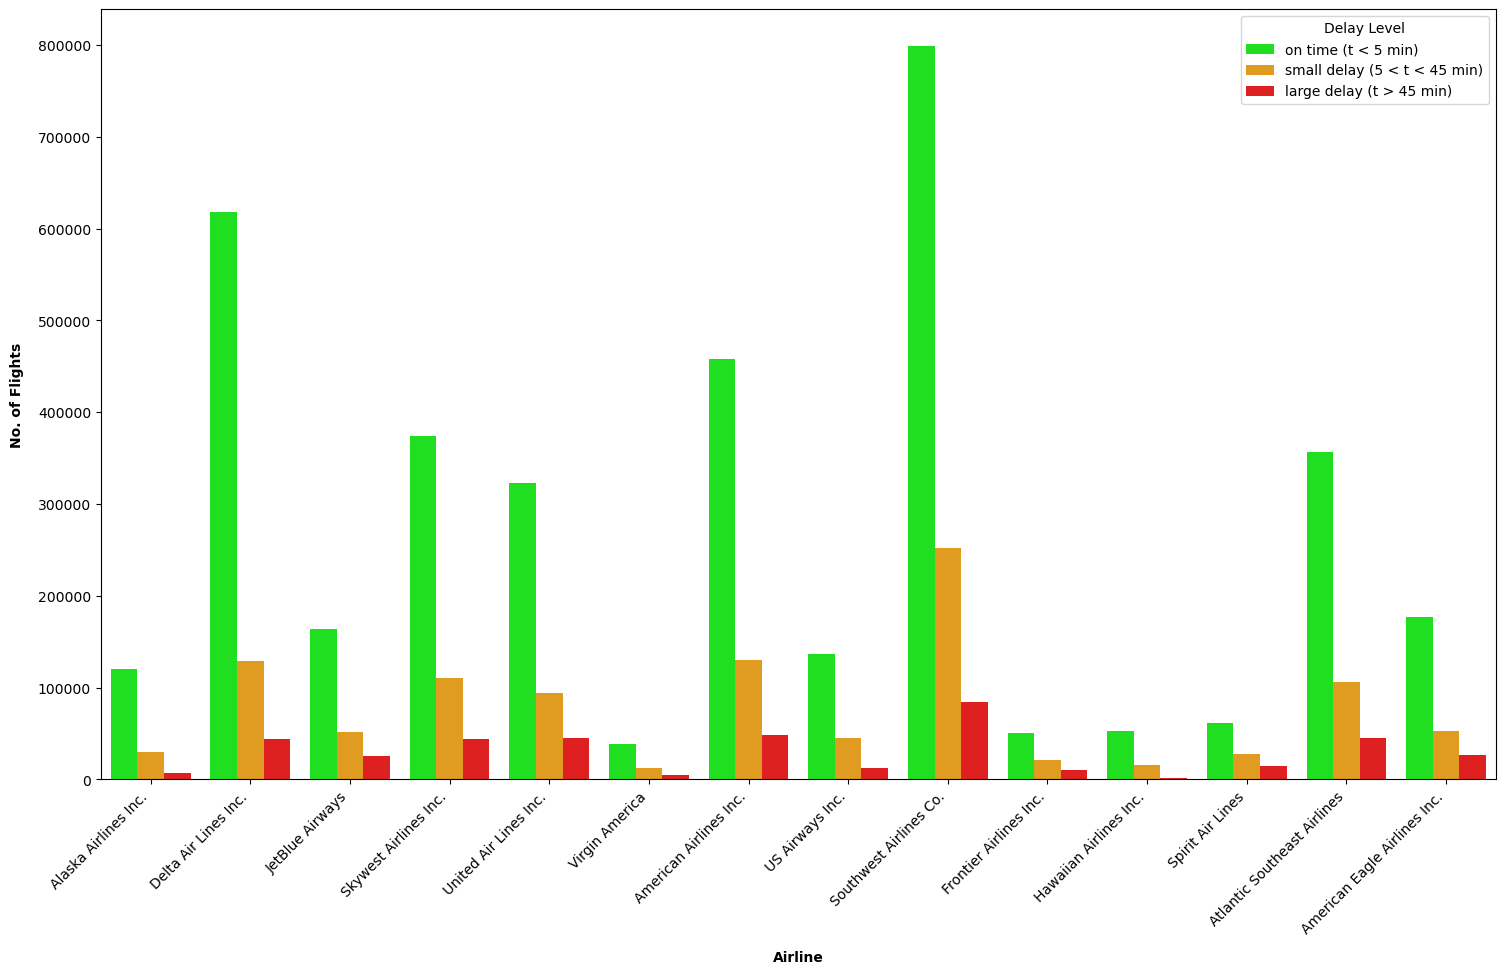

In [58]:
# Define a lambda function to classify delay types
delay_type = lambda x: 2 if x > 45 else (1 if x > 5 else 0)

# Create a copy of the Flights DataFrame to avoid modifying the original data
delayed=Flights.copy()

# Apply the delay_type function
delayed['DELAY_LEVEL'] = delayed['ARRIVAL_DELAY'].apply(delay_type)

# Create the count plot
fig = plt.figure(1, figsize=(18,10))


ax = sns.countplot(x="AIRLINE_NAME", hue='DELAY_LEVEL', data=delayed, palette=["#00FF00", "#FFA500", "#FF0000"])

# Customize labels
plt.ylabel('No. of Flights', fontsize=10, weight='bold', labelpad=10)
plt.xlabel('Airline', fontsize=10, weight='bold', labelpad=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend(title='Delay Level', labels=['on time (t < 5 min)', 'small delay (5 < t < 45 min)', 'large delay (t > 45 min)'])

# Display the plot
plt.show()

### This plotting creates a valuable visualization that helps analyze and compare flight delay patterns across airlines. By comparing the distribution of delay categories across airlines, we can identify airlines that seem to have more flights experiencing small or large delays.

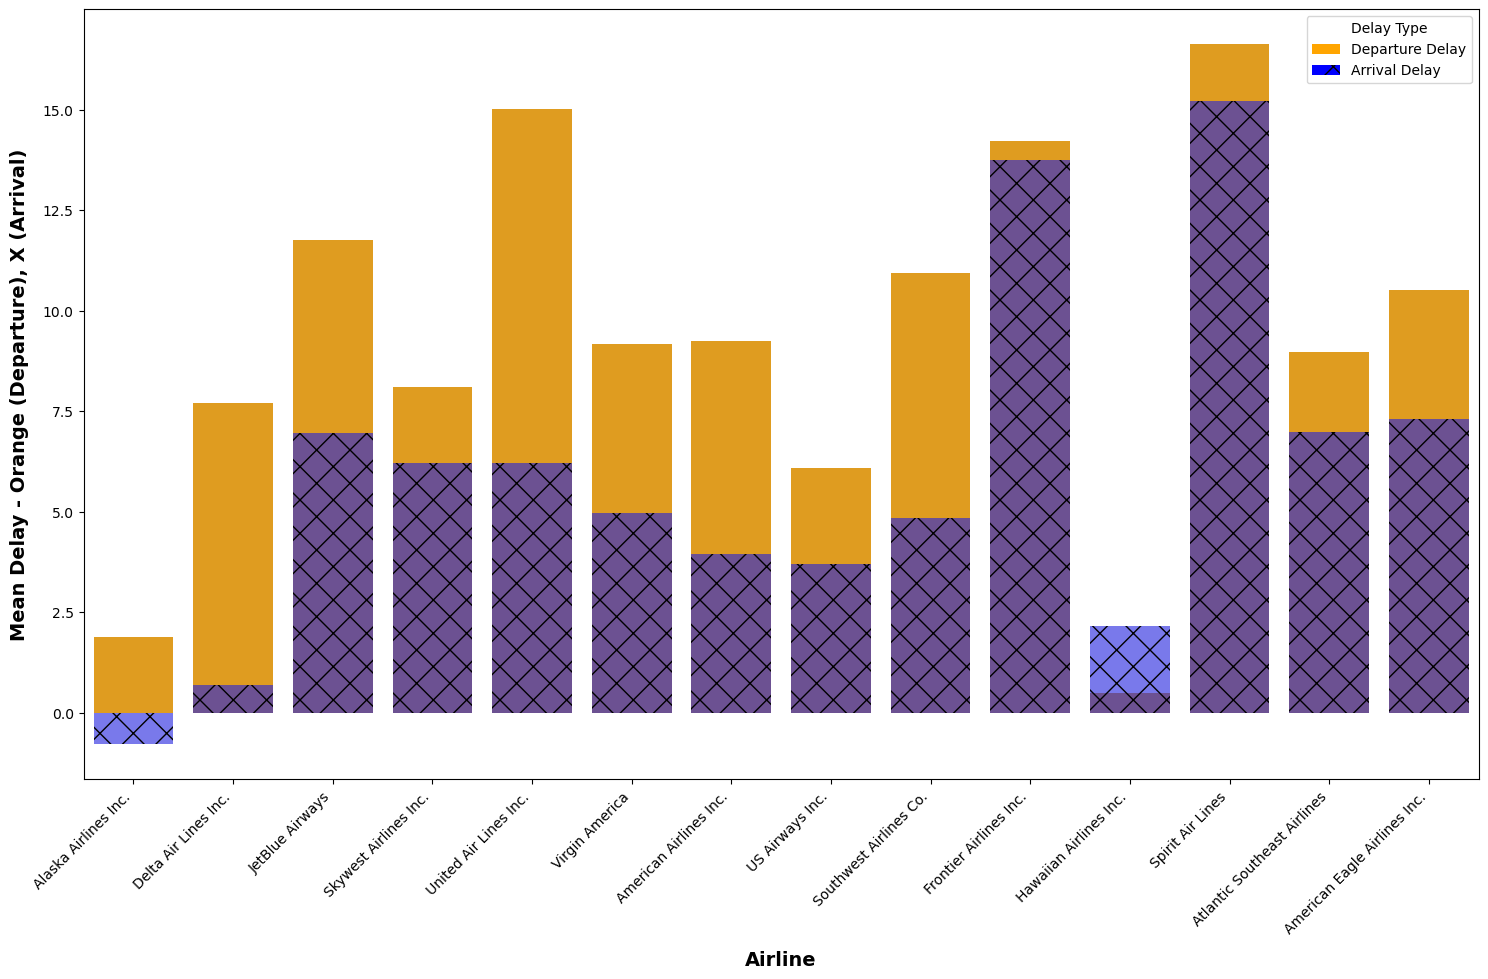

In [59]:
# Set the figure size for the bar plot
fig = plt.figure(1, figsize=(18,10))

# Plotting the departure delay (orange bars)
ax = sns.barplot(x="AIRLINE_NAME", y="DEPARTURE_DELAY", data=Flights, color="orange", ci=None)

# Overlaying the arrival delay (blue bars with 'X' hatch)
ax = sns.barplot(x="AIRLINE_NAME", y="ARRIVAL_DELAY", data=Flights, color="blue", hatch='X',
                 alpha=0.6, ci=None)

# Adding labels and customizing the appearance
plt.ylabel('Mean Delay - Orange (Departure), X (Arrival)',
           fontsize=14, weight='bold', labelpad=10)

plt.xlabel('Airline', fontsize=14, weight='bold', labelpad=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding a legend to distinguish the two barplots
from matplotlib.patches import Patch

legend_labels = [Patch(facecolor='orange', label='Departure Delay'),
                 Patch(facecolor='blue', hatch='X', label='Arrival Delay')]
plt.legend(handles=legend_labels, title='Delay Type', loc='upper right')

# Display the plot
plt.show()


### This visualization is useful for analyzing flight performance and identifying areas where airlines might need to focus on improving their on-time performance.we can easily compare the magnitude of delays (both departure and arrival) across different airlines by looking at the heights of the bars. Airlines with taller bars for either type of delay may require more attention.

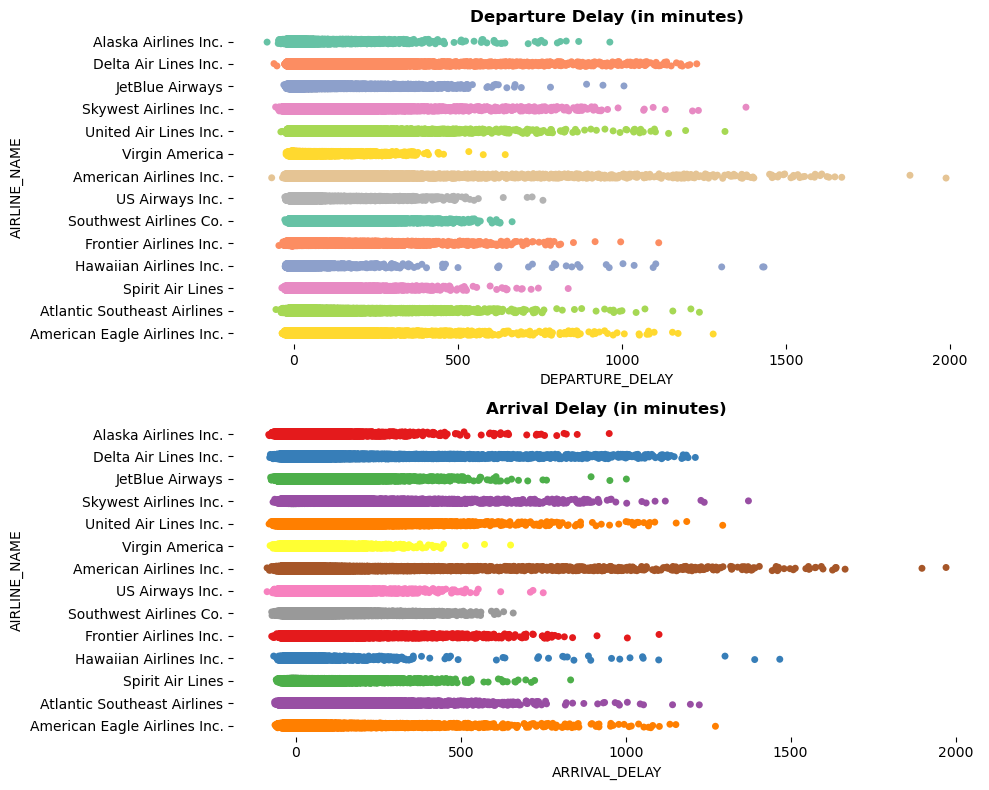

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots (one for departure delays and one for arrival delays)
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10,8))

# Remove the top and right spines for both subplots
sns.despine(bottom=True, left=True, ax=axs[0])
sns.despine(bottom=True, left=True, ax=axs[1])

# Create a strip plot for departure delays by airline (first subplot)
sns.stripplot(x="DEPARTURE_DELAY", 
              y="AIRLINE_NAME", 
              data=Flights, 
              dodge=True, 
              jitter=True, 
              palette="Set2", 
              ax=axs[0])

# Set the title for the first subplot
axs[0].set_title("Departure Delay (in minutes)",weight='bold')

# Create a strip plot for arrival delays by airline (second subplot)
sns.stripplot(x="ARRIVAL_DELAY", 
              y="AIRLINE_NAME", 
              data=Flights, 
              dodge=True, 
              jitter=True, 
              palette="Set1", 
              ax=axs[1])

# Set the title for the second subplot
axs[1].set_title("Arrival Delay (in minutes)",weight='bold')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

### This plot displays the distribution of departure and arrival delays across different airlines using strip plots. By visualizing the delays for each airline, it helps identify patterns and variability in delay times, enabling airlines and airports to pinpoint which carriers have more frequent or severe delays. This insight supports targeted interventions to improve operational efficiency and reduce delays.

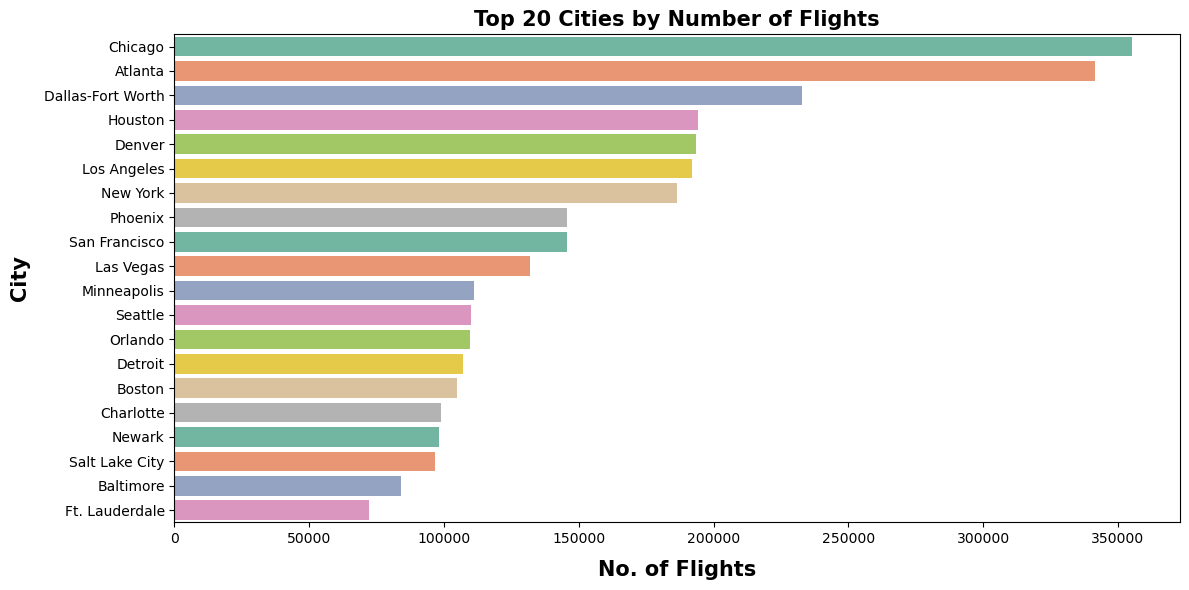

In [61]:
# Set the figure size for the bar plot
plt.figure(figsize=(12, 6))

# Create a count plot for the top 20 cities by number of flights
axis = sns.countplot(
    y=Flights['ORIGIN_CITY'],
    data=Flights,
    order=Flights['ORIGIN_CITY'].value_counts().iloc[:20].index,
    palette="Set2"
)

# Set the label for the x-axis (Number of Flights)
plt.xlabel('No. of Flights', fontsize=15, weight='bold', labelpad=10)

# Set the label for the y-axis (City names)
plt.ylabel('City', fontsize=15, weight='bold', labelpad=10)

# Set the title for the plot
plt.title('Top 20 Cities by Number of Flights', fontsize=15, weight='bold')

# Adjust the layout to ensure everything fits without overlapping
plt.tight_layout()

# Display the plot
plt.show()

### This visualization creates a clear and informative bar chart that provides insights into the distribution of flights across origin cities . By knowing the busiest origin cities, airlines can allocate resources more effectively, potentially focusing on optimizing routes, fleet allocation, and ground operations at these key locations.

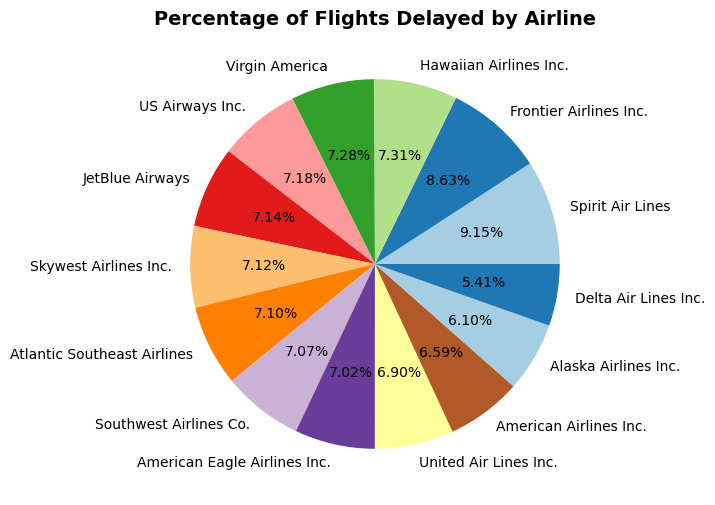

In [62]:
# Create a copy of the Flights DataFrame to avoid modifying the original data
Delayed = Flights.copy()

# Convert the 'ARRIVAL_DELAY' column to binary values: 1 if delayed, 0 if on-time or early
Delayed['ARRIVAL_DELAY'] = Delayed['ARRIVAL_DELAY'].apply(lambda x: 1 if x > 0 else 0)

# Calculate total flights and delayed flights for each airline
total_flights = Delayed.groupby('AIRLINE_NAME').size()
delayed_flights = Delayed.groupby('AIRLINE_NAME')['ARRIVAL_DELAY'].sum()

# Calculate the delay percentage
delay_percentage = (delayed_flights / total_flights) * 100

# Ensure the percentage is in the range of 1 to 100
delay_percentage = delay_percentage.clip(lower=1, upper=100)

# Sort by highest percentage of delays
delay_percentage = delay_percentage.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12,6))

# Create a pie chart
plt.pie(delay_percentage, labels=delay_percentage.index, autopct='%1.2f%%', colors=plt.cm.Paired.colors)

# Set the title of the chart
plt.title('Percentage of Flights Delayed by Airline',fontsize=14, weight='bold')

# Display the pie chart
plt.show()

### This plot presents the delay percentage per airline in a clear and visually informative way using a pie chart. It allows us to easily see which airlines have the highest overall percentage of delayed flights. This information can be valuable for further investigation or targeted improvement initiatives.

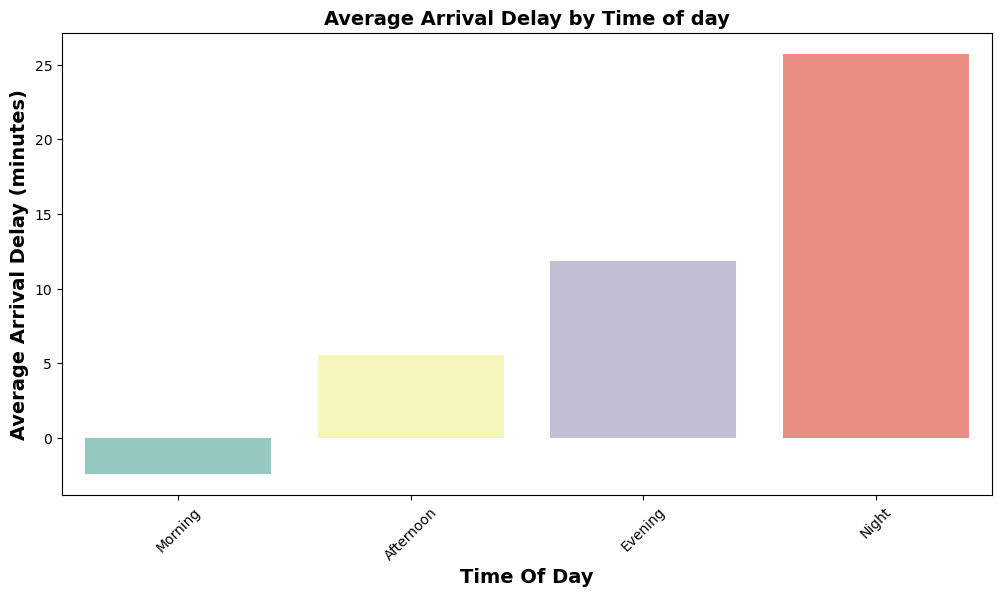

In [63]:
# Set the figure size for the bar plot
plt.figure(figsize=(12, 6))

# Create a bar plot to show the average arrival delay for each day of the time of day
sns.barplot(
    x='TIME_OF_DAY',
    y='ARRIVAL_DELAY', 
    data=Flights, order=['Morning', 'Afternoon', 'Evening', 'Night'], 
    palette="Set3",ci=None
)

# Set the label for the x-axis (Weekday)
plt.xlabel('Time Of Day', fontsize=14, weight='bold')

# Set the label for the y-axis (Average Arrival Delay in minutes)
plt.ylabel('Average Arrival Delay (minutes)', fontsize=14, weight='bold')

# Set the title for the plot
plt.title('Average Arrival Delay by Time of day', fontsize=14, weight='bold')

# Rotate the x-axis labels to avoid overlap and make them easier to read
plt.xticks(rotation=45)

# Display the bar plot
plt.show()




### This bar plot shows the average arrival delay for flights at different times of the day. It helps airlines and airports identify patterns in delays based on the time of day, allowing them to optimize scheduling and resource allocation to mitigate peak-time delays and improve overall efficiency.

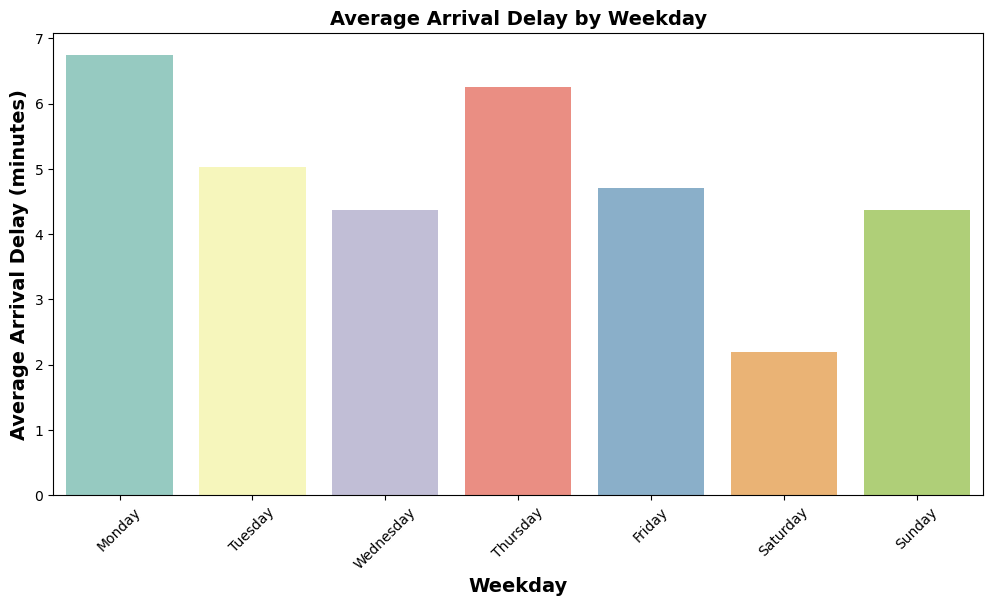

In [64]:
# Set the figure size for the bar plot
plt.figure(figsize=(12, 6))

# Create a bar plot to show the average arrival delay for each day of the week
sns.barplot(
    x='WEEK',
    y='ARRIVAL_DELAY', 
    data=Flights,order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
    palette="Set3",ci=None
)

# Set the label for the x-axis (Weekday)
plt.xlabel('Weekday', fontsize=14, weight='bold')

# Set the label for the y-axis (Average Arrival Delay in minutes)
plt.ylabel('Average Arrival Delay (minutes)', fontsize=14, weight='bold')

# Set the title for the plot
plt.title('Average Arrival Delay by Weekday', fontsize=14, weight='bold')

# Rotate the x-axis labels to avoid overlap and make them easier to read
plt.xticks(rotation=45)

# Display the bar plot
plt.show()


### This bar plot displays the average arrival delay for each day of the week.Knowing the days with higher average delays can be valuable for airlines when planning staffing, scheduling maintenance, or implementing proactive measures to minimize disruptions on those specific days.

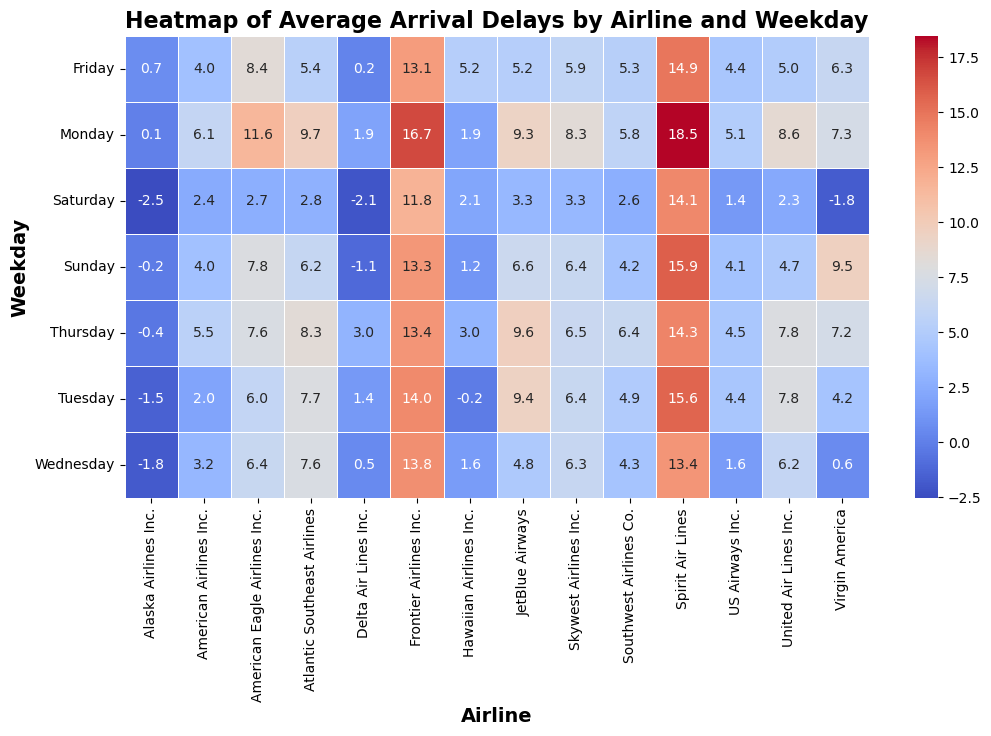

In [65]:
# Create a pivot table with Weekdays as rows, Airlines as columns, and mean arrival delay as values
pivot_table = Flights.pivot_table(index='WEEK', columns='AIRLINE_NAME', values='ARRIVAL_DELAY', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(12,6))

# Plot the heatmap
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)

# Set the title and labels
plt.title('Heatmap of Average Arrival Delays by Airline and Weekday', fontsize=16,weight='bold')
plt.xlabel('Airline', fontsize=14,weight='bold')
plt.ylabel('Weekday', fontsize=14,weight='bold')


# Show the plot
plt.show()


### The heatmap shows average arrival delays by airline and weekday, highlighting patterns in delays across different days and carriers. This helps airlines and airports identify high-delay days and problematic airlines, allowing for targeted scheduling adjustments and resource allocation to reduce delays and improve operational efficiency.









In [66]:
Flights.head(10)

,AIRLINE,AIRLINE_NAME,ORG_AIRPORT_NAME,ORIGIN_CITY,DEST_AIRPORT_NAME,DESTINATION_CITY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Actual_Departure,...,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,WHEELS_OFF,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TIME_OF_DAY
0,AS,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,23:54:00,...,-22.0,205.0,194.0,169.0,4.0,21.0,15,5,1434,Night
1,AS,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,00:41:00,...,-14.0,204.0,194.0,173.0,4.0,17.0,58,45,41,Night
2,AS,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,01:40:00,...,-35.0,218.0,198.0,170.0,11.0,17.0,117,115,100,Night
3,AS,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,02:09:00,...,-12.0,200.0,199.0,176.0,8.0,15.0,144,140,129,Night
4,AS,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,04:57:00,...,-14.0,205.0,199.0,179.0,4.0,16.0,313,305,297,Morning
5,AS,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,06:53:00,...,-15.0,210.0,202.0,179.0,7.0,16.0,429,420,413,Morning
6,AS,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,10:27:00,...,-9.0,207.0,206.0,180.0,5.0,21.0,648,635,627,Morning
7,AS,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,13:30:00,...,-10.0,195.0,195.0,171.0,6.0,18.0,828,820,810,Afternoon
8,AS,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,14:24:00,...,-17.0,200.0,189.0,175.0,7.0,7.0,871,870,864,Afternoon
9,AS,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,16:04:00,...,-24.0,200.0,187.0,173.0,4.0,10.0,974,975,964,Afternoon


In [67]:
Flights.columns

Index(['AIRLINE', 'AIRLINE_NAME', 'ORG_AIRPORT_NAME', 'ORIGIN_CITY',
       'DEST_AIRPORT_NAME', 'DESTINATION_CITY', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'DISTANCE', 'Actual_Departure', 'DATE', 'WEEK',
       'Scheduled_Departure', 'DEPARTURE_DELAY', 'Actual_Arrival',
       'Scheduled_Arrival', 'ARRIVAL_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME',
       'AIR_TIME', 'TAXI_IN', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'TIME_OF_DAY'],
      dtype='object')

In [68]:
#Removing columns that are not needed for prediction
Flights1 = Flights.drop(['AIRLINE_NAME','ORG_AIRPORT_NAME','DEST_AIRPORT_NAME','Scheduled_Departure','Scheduled_Arrival','Actual_Arrival','Actual_Departure','SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','ORIGIN_CITY','DESTINATION_CITY','TIME_OF_DAY','DISTANCE'],axis = 1)

In [69]:
#Creating a new feature which has value only as 0 or 1 depending on it it is dealyed or not

Flights1['IS_DELAYED'] = np.where(Flights1['ARRIVAL_DELAY']<=0, 0,1)

In [70]:
Flights1.columns

Index(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DATE', 'WEEK',
       'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'TAXI_IN', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'IS_DELAYED'],
      dtype='object')

# IMPLEMENTING THE MODELS

# Regression Models

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [73]:
import joblib
from sklearn.preprocessing import LabelEncoder

# Columns to encode
columns_to_encode = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT','WEEK']

# Dictionary to store the LabelEncoders and mappings
label_encoders = {}
mappings = {}

# Apply LabelEncoder to selective columns
for column in columns_to_encode:
    # Initialize a LabelEncoder for the column
    encoder = LabelEncoder()
    # Fit and transform the column in the dataset
    Flights1[column] = encoder.fit_transform(Flights1[column])
    # Store the LabelEncoder instance in the dictionary
    label_encoders[column] = encoder
    # Store the mapping (class to label) in the mappings dictionary
    mappings[column] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))


# Display the mappings
print("\nMappings:")
for column, mapping in mappings.items():
    print(f"{column}_mapping: {mapping}\n")
    print("-------------------------------------------------------------------------------------------------------------")


Mappings:
AIRLINE_mapping: {'AA': 0, 'AS': 1, 'B6': 2, 'DL': 3, 'EV': 4, 'F9': 5, 'HA': 6, 'MQ': 7, 'NK': 8, 'OO': 9, 'UA': 10, 'US': 11, 'VX': 12, 'WN': 13}

-------------------------------------------------------------------------------------------------------------
ORIGIN_AIRPORT_mapping: {'ABE': 0, 'ABI': 1, 'ABQ': 2, 'ABR': 3, 'ABY': 4, 'ACK': 5, 'ACT': 6, 'ACV': 7, 'ACY': 8, 'ADK': 9, 'ADQ': 10, 'AEX': 11, 'AGS': 12, 'AKN': 13, 'ALB': 14, 'ALO': 15, 'AMA': 16, 'ANC': 17, 'APN': 18, 'ASE': 19, 'ATL': 20, 'ATW': 21, 'AUS': 22, 'AVL': 23, 'AVP': 24, 'AZO': 25, 'BDL': 26, 'BET': 27, 'BFL': 28, 'BGM': 29, 'BGR': 30, 'BHM': 31, 'BIL': 32, 'BIS': 33, 'BJI': 34, 'BLI': 35, 'BMI': 36, 'BNA': 37, 'BOI': 38, 'BOS': 39, 'BPT': 40, 'BQK': 41, 'BQN': 42, 'BRD': 43, 'BRO': 44, 'BRW': 45, 'BTM': 46, 'BTR': 47, 'BTV': 48, 'BUF': 49, 'BUR': 50, 'BWI': 51, 'BZN': 52, 'CAE': 53, 'CAK': 54, 'CDC': 55, 'CDV': 56, 'CEC': 57, 'CHA': 58, 'CHO': 59, 'CHS': 60, 'CID': 61, 'CIU': 62, 'CLD': 63, 'CLE': 64, 

In [75]:
import joblib

# Save the dictionary of LabelEncoders
joblib.dump(label_encoders, 'C:\\Users\\HP\\OneDrive\\Documents\\Flight_Delay\\JOBLIB\\label_encoder_complete.joblib')

['C:\\Users\\HP\\OneDrive\\Documents\\Flight_Delay\\JOBLIB\\label_encoder_complete.joblib']

In [74]:
Flights1[['AIRLINE', 'ORIGIN_AIRPORT','DESTINATION_AIRPORT','WEEK']]

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,WEEK
0,1,17,275,4
1,1,17,275,4
2,1,17,275,4
3,1,17,275,4
4,1,17,275,4
...,...,...,...,...
5221995,4,195,239,5
5221996,4,195,239,6
5221997,4,195,239,6
5221998,4,195,239,4


In [75]:
Flights1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5222000 entries, 0 to 5221999
Data columns (total 13 columns):
 #   Column               Dtype         
---  ------               -----         
 0   AIRLINE              int32         
 1   ORIGIN_AIRPORT       int32         
 2   DESTINATION_AIRPORT  int32         
 3   DATE                 datetime64[ns]
 4   WEEK                 int32         
 5   DEPARTURE_DELAY      float64       
 6   ARRIVAL_DELAY        float64       
 7   TAXI_IN              float64       
 8   TAXI_OUT             float64       
 9   WHEELS_OFF           int64         
 10  SCHEDULED_DEPARTURE  int64         
 11  DEPARTURE_TIME       int64         
 12  IS_DELAYED           int32         
dtypes: datetime64[ns](1), float64(4), int32(5), int64(3)
memory usage: 458.2 MB


In [76]:
X = Flights1.drop(['ARRIVAL_DELAY','IS_DELAYED','DATE'],axis = 1)
X.shape

(5222000, 10)

In [77]:
y = Flights1['ARRIVAL_DELAY']
y.head()

0   -22.0
1   -14.0
2   -35.0
3   -12.0
4   -14.0
Name: ARRIVAL_DELAY, dtype: float64

In [95]:
#Split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 5)

In [96]:
#Applying Standard Scalar for regression 

sc1=StandardScaler()
X_train_sc=sc1.fit_transform(X_train)
X_test_sc=sc1.transform(X_test)

In [82]:
# Save StandardScaler
joblib.dump(sc1,'C:\\Users\\HP\\OneDrive\\Documents\\Flight_Delay\\JOBLIB\\scalar_complete.joblib')

['C:\\Users\\HP\\OneDrive\\Documents\\Flight_Delay\\JOBLIB\\scalar_complete.joblib']

## Linear Regression

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Linear Regression model
LinR = LinearRegression()

# Fit the model on the training data
fitResult = LinR.fit(X_train_sc, y_train)

# Predict the target values on the test data
y_pred_lr = fitResult.predict(X_test_sc)

# Evaluate the model's performance

MAE_lr = mean_absolute_error(y_test, y_pred_lr)
MSE_lr = mean_squared_error(y_test, y_pred_lr)
RMSE_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
R2_lr = r2_score(y_test, y_pred_lr)

print('MAE:', MAE_lr)
print('MSE:', MSE_lr)
print('RMSE:', RMSE_lr)
print('R2:', R2_lr)

MAE: 7.551226401979039
MSE: 102.52987595244242
RMSE: 10.125703726282062
R2: 0.9339550420713578


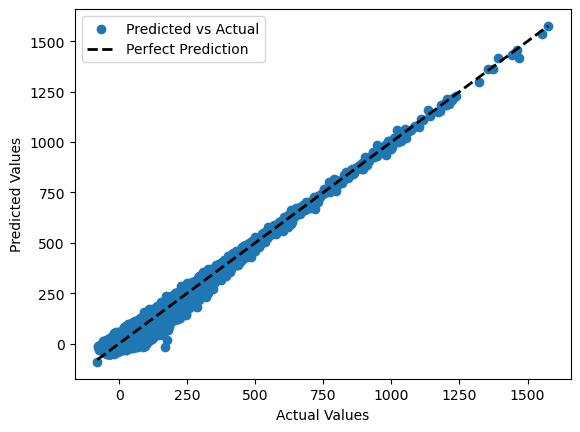

In [81]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred_lr, label='Predicted vs Actual')

# Add a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Perfect Prediction')

# Label the axes
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Add a legend
plt.legend()

# Display the plot
plt.show()


# Xgboost

In [82]:
import xgboost as xgb
from xgboost import XGBRegressor

# Create an XGBRegressor model
xgbr = XGBRegressor(random_state=2)

# Fit the model to the training data
fitResultXGB = xgbr.fit(X_train_sc, y_train)

# Predict the values on the test data
y_pred_xg = fitResultXGB.predict(X_test_sc)

# Evaluate the model's performance

MAE_xg = mean_absolute_error(y_test, y_pred_xg)
MSE_xg = mean_squared_error(y_test, y_pred_xg)
RMSE_xg = np.sqrt(mean_squared_error(y_test, y_pred_xg))
R2_xg = r2_score(y_test, y_pred_xg)

print('MAE:', MAE_xg)
print('MSE:', MSE_xg)
print('RMSE:', RMSE_xg)
print('R2:', R2_xg)

MAE: 6.460565819674812
MSE: 85.68785416762151
RMSE: 9.25677342099403
R2: 0.9448038859803051


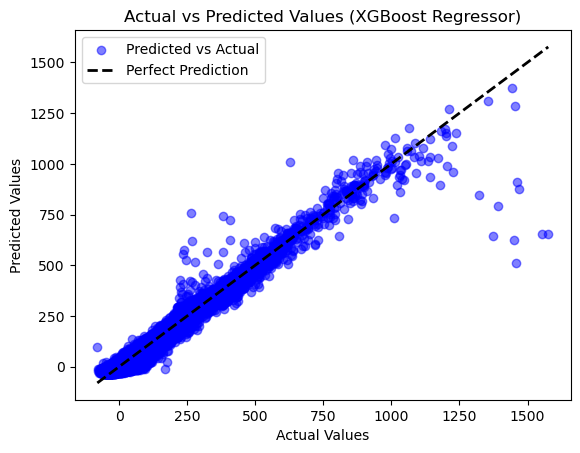

In [83]:
# Create a scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred_xg, label='Predicted vs Actual', color='blue', alpha=0.5)

# Add a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Perfect Prediction')

# Label the axes
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Add a legend
plt.legend()

# Add a title
plt.title('Actual vs Predicted Values (XGBoost Regressor)')

# Display the plot
plt.show()

# Support Vector Machine (SVM)

In [97]:
from sklearn.svm import SVR

# Create an SVR model
svr = SVR(kernel='linear')

# Fit the model to the training data
fitResultSVR = svr.fit(X_train_sc, y_train)

# Predict the values on the test data
y_pred_svr = fitResultSVR.predict(X_test_sc)

# Evaluate the model's performance

MAE_svr = mean_absolute_error(y_test, y_pred_svr)
MSE_svr = mean_squared_error(y_test, y_pred_svr)
RMSE_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
R2_svr = r2_score(y_test, y_pred_svr)

print('MAE:', MAE_svr)
print('MSE:', MSE_svr)
print('RMSE:', RMSE_svr)
print('R2:', R2_svr)

MAE: 7.548523081142465
MSE: 103.83500810443573
RMSE: 10.189946423040492
R2: 0.935127152547029


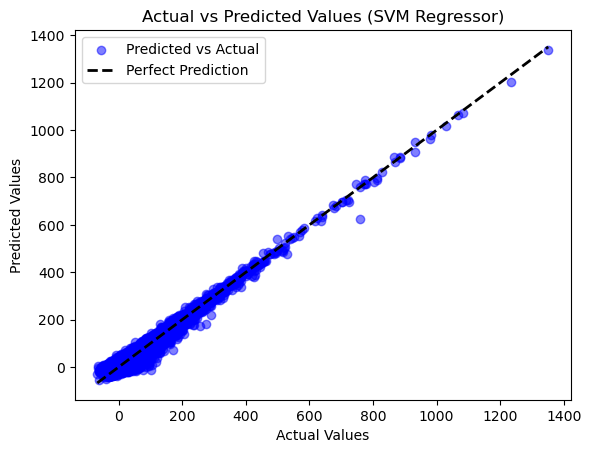

In [98]:
# Create a scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred_svr, label='Predicted vs Actual', color='blue', alpha=0.5)

# Add a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Perfect Prediction')

# Label the axes
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Add a legend
plt.legend()

# Add a title
plt.title('Actual vs Predicted Values (SVM Regressor)')

# Display the plot
plt.show()

# Classification Models

In [88]:
Flights1

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DATE,WEEK,DEPARTURE_DELAY,ARRIVAL_DELAY,TAXI_IN,TAXI_OUT,WHEELS_OFF,SCHEDULED_DEPARTURE,DEPARTURE_TIME,IS_DELAYED
0,1,17,275,2015-01-01,4,-11.0,-22.0,4.0,21.0,15,5,1434,0
1,1,17,275,2015-01-01,4,-4.0,-14.0,4.0,17.0,58,45,41,0
2,1,17,275,2015-01-01,4,-15.0,-35.0,11.0,17.0,117,115,100,0
3,1,17,275,2015-01-01,4,-11.0,-12.0,8.0,15.0,144,140,129,0
4,1,17,275,2015-01-01,4,-8.0,-14.0,4.0,16.0,313,305,297,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5221995,4,195,239,2015-12-29,5,-9.0,-18.0,2.0,6.0,1243,1246,1237,0
5221996,4,195,239,2015-12-30,6,101.0,90.0,5.0,4.0,980,875,976,1
5221997,4,195,239,2015-12-30,6,10.0,10.0,4.0,12.0,1268,1246,1256,1
5221998,4,195,239,2015-12-31,4,-14.0,-18.0,3.0,9.0,870,875,861,0


In [89]:
X = Flights1.drop(['ARRIVAL_DELAY','IS_DELAYED','DATE'],axis = 1)
X.shape
y = Flights1['IS_DELAYED']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: IS_DELAYED, dtype: int32

In [90]:
X

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,WEEK,DEPARTURE_DELAY,TAXI_IN,TAXI_OUT,WHEELS_OFF,SCHEDULED_DEPARTURE,DEPARTURE_TIME
0,1,17,275,4,-11.0,4.0,21.0,15,5,1434
1,1,17,275,4,-4.0,4.0,17.0,58,45,41
2,1,17,275,4,-15.0,11.0,17.0,117,115,100
3,1,17,275,4,-11.0,8.0,15.0,144,140,129
4,1,17,275,4,-8.0,4.0,16.0,313,305,297
...,...,...,...,...,...,...,...,...,...,...
5221995,4,195,239,5,-9.0,2.0,6.0,1243,1246,1237
5221996,4,195,239,6,101.0,5.0,4.0,980,875,976
5221997,4,195,239,6,10.0,4.0,12.0,1268,1246,1256
5221998,4,195,239,4,-14.0,3.0,9.0,870,875,861


In [91]:
y

0          0
1          0
2          0
3          0
4          0
          ..
5221995    0
5221996    1
5221997    1
5221998    0
5221999    0
Name: IS_DELAYED, Length: 5222000, dtype: int32

In [92]:
#Split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 2)

In [93]:
y_train.value_counts()

0    2295107
1    1360293
Name: IS_DELAYED, dtype: int64

In [94]:
#Applying SMOTE to deal with class imbalance
#SMOTE stands for (Synthetic Minority Over-sampling Technique)
# SMOTE works by identifying the minority class in the dataset.
# For each minority class instance, it finds its k-nearest neighbors within the minority class.
# It then generates synthetic samples along the line segments connecting the instance to its neighbors.
# This process helps to balance the class distribution by increasing the number of samples in the minority class.
from imblearn.over_sampling import SMOTE

smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)


In [95]:
pd.Series(y_train).value_counts()

0    2295107
1    2295107
Name: IS_DELAYED, dtype: int64

In [96]:
#Applying Standard Scalar for classification 
sc1=StandardScaler()
X_train_sc=sc1.fit_transform(X_train)
X_test_sc=sc1.transform(X_test)

In [97]:
y_train

0          0
1          1
2          0
3          1
4          0
          ..
4590209    1
4590210    1
4590211    1
4590212    1
4590213    1
Name: IS_DELAYED, Length: 4590214, dtype: int32

In [98]:
X_test_sc

array([[ 1.35375924,  0.49650931,  0.14541878, ..., -0.15954121,
        -0.19995456, -0.19109162],
       [-0.82778479,  0.36940294,  0.16850365, ..., -1.32412539,
        -1.33762955, -1.34190074],
       [-0.82778479,  0.6351708 , -1.6205735 , ..., -0.51224385,
        -0.49643956, -0.52228378],
       ...,
       [ 0.26298723,  0.14985558, -0.85877291, ..., -2.53862031,
        -2.63044204, -2.54289048],
       [-0.82778479,  1.43247436,  1.4381713 , ..., -0.4623331 ,
        -0.44127956, -0.4654124 ],
       [-0.82778479, -0.04658153, -0.77797587, ..., -1.1011907 ,
        -1.47552955, -1.14452359]])

# DecisionTree 

In [99]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the DecisionTreeClassifier
classifierDT = DecisionTreeClassifier(criterion = 'entropy', random_state = None)

# Fit the classifier on the training data
classifierDT.fit(X_train_sc, y_train)

DecisionTreeClassifier(criterion='entropy')

In [100]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# Predicting the Test set results
y_pred_DT = classifierDT.predict(X_test_sc)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_DT)
print(f"Confusion Matrix :\n {cm}")

#Calculating the accuracy
score_DT = classifierDT.score(X_test_sc,y_test)
print(f"Accuracy : {score_DT}")

Confusion Matrix :
 [[833812 150199]
 [142805 439784]]
Accuracy : 0.8129682114132516


In [101]:
# Calculating F1 score,Precision,Recall of model
F1_score_DT = f1_score(y_test, y_pred_DT, average="macro")
Precision_DT = precision_score(y_test, y_pred_DT, average="macro")
Recall_DT = recall_score(y_test, y_pred_DT, average="macro")

print("F1 score :",F1_score_DT)
print("Precision Score :" , Precision_DT)
print("Recall Score :" , Recall_DT)   

F1 score : 0.800337294577617
Precision Score : 0.7995969643978468
Recall Score : 0.8011195499537334


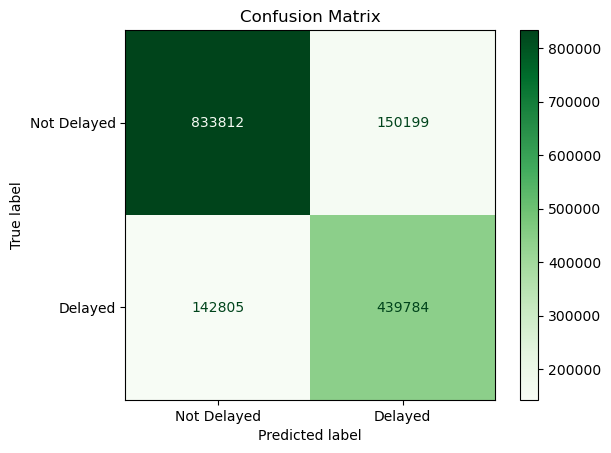

In [102]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Function to format tick labels in decimal notation
def format_func(value, tick_number):
    return f'{int(value):,}'

# Assuming `cm` is your confusion matrix
# Set display labels to your desired labels
labels = ['Not Delayed', 'Delayed']

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Greens, values_format='d')

# Set the title of the plot
plt.title('Confusion Matrix')

# Apply custom formatting to both x and y axis tick labels
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_func))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

# Manually set the tick labels
plt.gca().set_xticks([0, 1])
plt.gca().set_xticklabels(labels)
plt.gca().set_yticks([0, 1])
plt.gca().set_yticklabels(labels)

# Show the plot
plt.show()


# K-Nearest Neighbor

In [103]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNeighborsClassifier
classifier_Knn = KNeighborsClassifier(
    n_neighbors=5,
    algorithm='auto',   # Use 'auto' to choose the best algorithm based on the input data
    leaf_size=40,       # Larger leaf size may speed up the training time
    metric='euclidean',
    n_jobs=-1           # Use all available cores for parallel processing
)

# Fit the classifier on the training data
classifier_Knn.fit(X_train_sc,y_train)

KNeighborsClassifier(leaf_size=40, metric='euclidean', n_jobs=-1)

In [104]:
# Predicting the Test set results
y_pred_knn=classifier_Knn.predict(X_test_sc)

from sklearn.metrics import confusion_matrix

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
print(f"Confusion Matrix :\n {cm}")

#Calculating the accuracy
score_knn = classifier_Knn.score(X_test_sc,y_test)
print(f"Accuracy : {score_knn}")

Confusion Matrix :
 [[851271 132740]
 [132998 449591]]
Accuracy : 0.830372781820503


In [105]:
# Calculating F1 score,Precision,Recall of model
F1_score_knn = f1_score(y_test, y_pred_knn, average="macro")
Precision_knn = precision_score(y_test, y_pred_knn, average="macro")
Recall_knn = recall_score(y_test, y_pred_knn, average="macro")

print("F1 score :",F1_score_knn)
print("Precision Score :",Precision_knn)
print("Recall Score :",Recall_knn)   

F1 score : 0.818436392497722
Precision Score : 0.8184652040874316
Recall Score : 0.8184076336315704


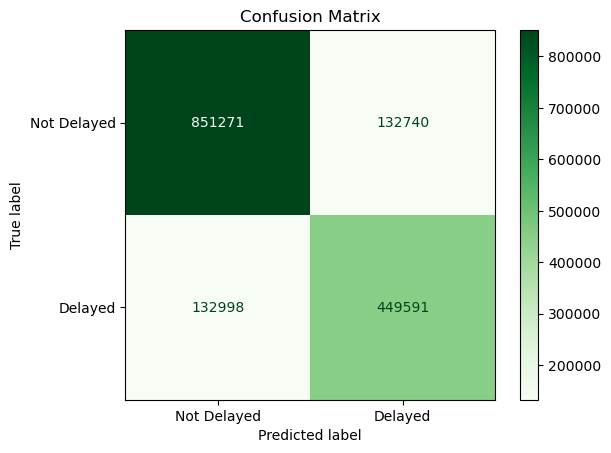

In [106]:
# Function to format tick labels in decimal notation
def format_func(value, tick_number):
    return f'{int(value):,}'

# Assuming `cm` is your confusion matrix
# Set display labels to your desired labels
labels = ['Not Delayed', 'Delayed']

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Greens, values_format='d')

# Set the title of the plot
plt.title('Confusion Matrix')

# Apply custom formatting to both x and y axis tick labels
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_func))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

# Manually set the tick labels
plt.gca().set_xticks([0, 1])
plt.gca().set_xticklabels(labels)
plt.gca().set_yticks([0, 1])
plt.gca().set_yticklabels(labels)

# Show the plot
plt.show()



# LogisticRegression

In [107]:
from sklearn.linear_model import LogisticRegression

# Initialize the LogisticRegression
classifier_log = LogisticRegression(random_state = 0)

# Fit the classifier on the training data
classifier_log.fit(X_train_sc, y_train)

LogisticRegression(random_state=0)

In [108]:
# Predicting the Test set results
y_pred_log = classifier_log.predict(X_test_sc)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log)
print(f"Confusion Matrix :\n {cm}")

#Calculating the accuracy
score_log = classifier_log.score(X_test_sc,y_test)
print(f"Accuracy : {score_log}")

Confusion Matrix :
 [[870908 113103]
 [122139 460450]]
Accuracy : 0.8498391420911529


In [109]:
# Calculating F1 score,Precision,Recall of model
F1_score_log = f1_score(y_test, y_pred_log, average="macro")
Precision_log = precision_score(y_test, y_pred_log, average="macro")
Recall_log = recall_score(y_test, y_pred_log, average="macro")

print("F1 score :",F1_score_log)
print("Precision Score :",Precision_log)
print("Recall Score :",Recall_log)    

F1 score : 0.8387712835030885
Precision Score : 0.8399043505355579
Recall Score : 0.837705278598059


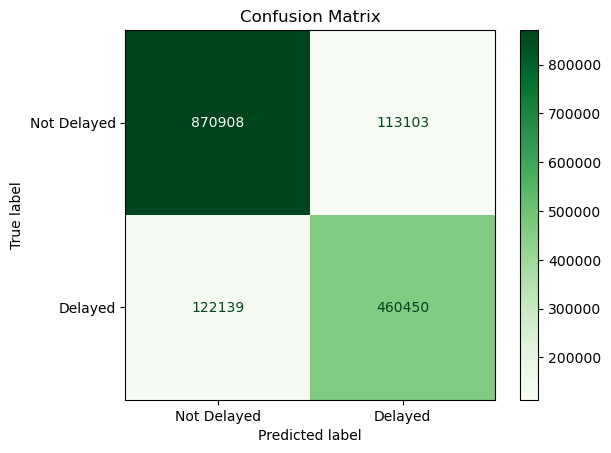

In [110]:
# Function to format tick labels in decimal notation
def format_func(value, tick_number):
    return f'{int(value):,}'

# Assuming `cm` is your confusion matrix
# Set display labels to your desired labels
labels = ['Not Delayed', 'Delayed']

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Greens, values_format='d')

# Set the title of the plot
plt.title('Confusion Matrix')

# Apply custom formatting to both x and y axis tick labels
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_func))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

# Manually set the tick labels
plt.gca().set_xticks([0, 1])
plt.gca().set_xticklabels(labels)
plt.gca().set_yticks([0, 1])
plt.gca().set_yticklabels(labels)

# Show the plot
plt.show()


# RandomForest

In [111]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
classifier_RF = RandomForestClassifier(
    random_state=0,   # Seed for the random number generator to ensure reproducibility
    n_jobs=-1,        # Use all available cores for parallel processing
    n_estimators=100, # Number of trees in the forest; fewer trees reduce model size
    max_depth=10      # Maximum depth of each tree; shallower trees are smaller
)

# Fit the classifier on the training data
classifier_RF.fit(X_train_sc, y_train)


RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=0)

In [112]:
# Predicting the Test set results
y_pred_RF = classifier_RF.predict(X_test_sc)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_RF)
print(f"Confusion Matrix :\n {cm}")

#Calculating the accuracy
score_RF = classifierDT.score(X_test_sc,y_test)
print(f"Accuracy : {score_RF}")

Confusion Matrix :
 [[881110 102901]
 [127093 455496]]
Accuracy : 0.8129682114132516


In [113]:
# Calculating F1 score,Precision,Recall of model
F1_score_RF = f1_score(y_test, y_pred_RF, average="macro")
Precision_RF = precision_score(y_test, y_pred_RF, average="macro")
Recall_RF = recall_score(y_test, y_pred_RF, average="macro")

print("F1 score :",F1_score_RF)
print("Precision Score :",Precision_RF)
print("Recall Score :",Recall_RF)  

F1 score : 0.8414893943653459
Precision Score : 0.8448308881523299
Recall Score : 0.8386374528401634


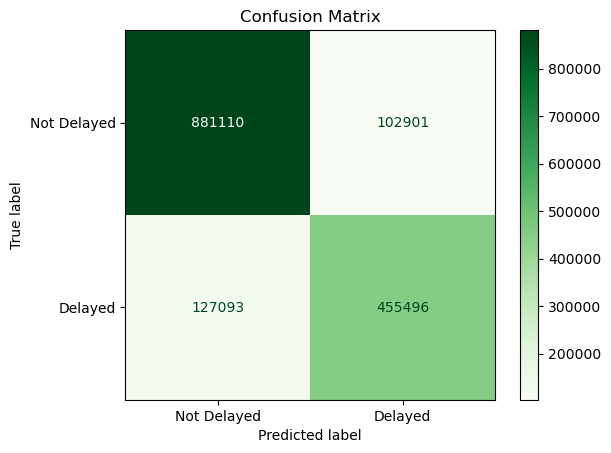

In [114]:
# Function to format tick labels in decimal notation
def format_func(value, tick_number):
    return f'{int(value):,}'

# Assuming `cm` is your confusion matrix
# Set display labels to your desired labels
labels = ['Not Delayed', 'Delayed']

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Greens, values_format='d')

# Set the title of the plot
plt.title('Confusion Matrix')

# Apply custom formatting to both x and y axis tick labels
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_func))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

# Manually set the tick labels
plt.gca().set_xticks([0, 1])
plt.gca().set_xticklabels(labels)
plt.gca().set_yticks([0, 1])
plt.gca().set_yticklabels(labels)

# Show the plot
plt.show()



# Neural Network

In [126]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential()

# Input layer 
model.add(Dense(units=10, activation='relu', input_shape=(10,)))
model.add(Dropout(0.3))

# First hidden layer
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

# Second hidden layer
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,007 (3.93 KB)

 Trainable params: 1,007 (3.93 KB)

 Non-trainable params: 0 (0.00 B)

In [127]:
# Train the model using the training data
history1 = model.fit(X_train_sc, y_train, epochs=20, batch_size=5000, validation_split=0.2)

# Evaluate the model using the test data
test_loss, test_accuracy = model.evaluate(X_test_sc, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/20
735/735 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7374 - loss: 0.5230 - val_accuracy: 0.7167 - val_loss: 0.5232
Epoch 2/20
735/735 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8513 - loss: 0.3557 - val_accuracy: 0.7200 - val_loss: 0.5510
Epoch 3/20
735/735 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8513 - loss: 0.3523 - val_accuracy: 0.7076 - val_loss: 0.5614
Epoch 4/20
735/735 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8512 - loss: 0.3503 - val_accuracy: 0.7118 - val_loss: 0.5575
Epoch 5/20
735/735 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8516 - loss: 0.3488 - val_accuracy: 0.7090 - val_loss: 0.5554
Epoch 6/20
735/735 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8518 - loss: 0.3484 - val_accuracy: 0.7046 - val_loss: 0.5625
Epoch 7/20
735/735 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8520 - loss: 0.3478 - val_accuracy: 0.6956 - val_loss: 0.5650
Epoch 8/20
735/735 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8515 - loss: 0.3482 - val_accuracy: 0.

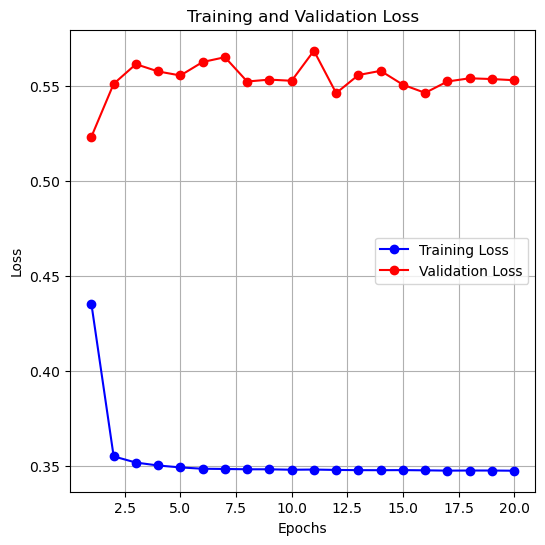

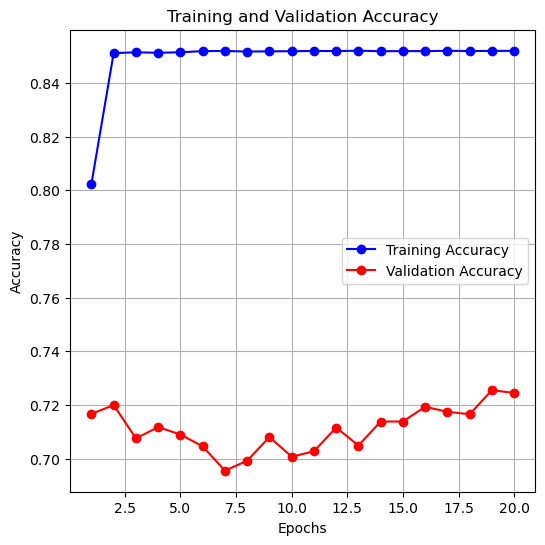

In [128]:
import matplotlib.pyplot as plt

# Assuming 'history1' is the object returned by model.fit()

# Extracting values from the history object
loss = history1.history['loss']
val_loss = history1.history['val_loss']
accuracy = history1.history['accuracy']
val_accuracy = history1.history['val_accuracy']

epochs = range(1, len(loss) + 1)

# Plotting Training and Validation Loss
plt.figure(figsize=(6, 6))
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Training and Validation Accuracy
plt.figure(figsize=(6, 6))
plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Comparision of models 

In [99]:
# Define the metrics Table of each Regression model for comparision
reg_metrics = {
    'MAE': [MAE_lr,MAE_xg,MAE_svr],
    'MSE': [MSE_lr,MSE_xg,MSE_svr],
    'RMSE': [RMSE_lr,RMSE_xg,RMSE_svr],
    'R2': [R2_lr,R2_xg,R2_svr]
}

# Create a DataFrame from the metrics with models as the index
reg_metrics_df = pd.DataFrame(reg_metrics, index=['Linear Regression', 'XGBoost', 'Support Vector Machine (SVM)'])

reg_metrics_df

,MAE,MSE,RMSE,R2
Linear Regression,7.551226,102.529876,10.125704,0.933955
XGBoost,6.460566,85.687854,9.256773,0.944804
Support Vector Machine (SVM),7.548523,103.835008,10.189946,0.935127


In [87]:
# Save the model to a file using joblib
joblib.dump(LinR, 'C:\\Users\\HP\\OneDrive\\Documents\\Flight_Delay\\JOBLIB\\linear_regression_model_complete.joblib')

['C:\\Users\\HP\\OneDrive\\Documents\\Flight_Delay\\JOBLIB\\linear_regression_model_complete.joblib']

In [115]:
# Define the metrics Table of each Classification model for comparision
cl_metrics = {
    'Accuracy': [score_DT,score_knn,score_log,score_RF],
    'F1-Score': [F1_score_DT,F1_score_knn,F1_score_log,F1_score_RF],
    'Precision': [Precision_DT,Precision_knn,Precision_log,Precision_RF],
    'Recall': [Recall_DT,Recall_knn,Recall_log,Recall_RF]
}

# Create a DataFrame from the metrics with models as the index
cl_metrics_df = pd.DataFrame(cl_metrics, index=['DecisionTree', 'K-Nearest Neighbor', 'LogisticRegression','RandomForest'])

cl_metrics_df

,Accuracy,F1-Score,Precision,Recall
DecisionTree,0.812968,0.800337,0.799597,0.801120
K-Nearest Neighbor,0.830373,0.818436,0.818465,0.818408
LogisticRegression,0.849839,0.838771,0.839904,0.837705
RandomForest,0.812968,0.841489,0.844831,0.838637


In [119]:
# Save the model to a file using joblib
joblib.dump(classifier_log, 'C:\\Users\\HP\\OneDrive\\Documents\\Flight_Delay\\JOBLIB\\logistic_regression_model_complete.joblib')

['C:\\Users\\HP\\OneDrive\\Documents\\Flight_Delay\\JOBLIB\\logistic_regression_model_complete.joblib']

# Limitations 

 Geographic Scope: The flight data is limited to the United States, restricting the analysis to domestic flights. This limits the ability to draw conclusions about international flight patterns or compare performance across different regions.Temporal Scope: The data is outdated, dating back to 2015. This means the analysis may not accurately reflect current trends or changes in the airline industry, such as the impact of recent events or technological advancements.These limitations could potentially affect the generalizability and relevance of the findings to other regions or time periods.

# Future Scope 

### The future scope of our project could involve expanding the data and analysis to address the limitations mentioned earlier. Here are some potential areas to explore:

### Data Expansion:

International Flights: Include data on international flights to broaden the scope of analysis and compare domestic and international flight performance.
More Recent Data: Obtain more recent flight data to ensure the analysis is up-to-date and reflects current trends in the airline industry.

### Additional Analyses:

#### Delay Causes: 
Investigate the underlying causes of flight delays, such as weather conditions, air traffic congestion, or operational issues.
Airline Performance: Conduct a more in-depth analysis of individual airlines, comparing their on-time performance, delay patterns, and other relevant metrics.

#### Route Analysis: 
Analyze flight delays based on specific routes, identifying routes with frequent delays or patterns of delays.
Seasonal Patterns: Explore how flight delays vary across different seasons or time periods.
Impact of External Factors: Examine the impact of external factors, such as economic conditions, fuel prices, or geopolitical events, on flight delays.